# Some Initiation Code.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.model_selection import LeavePGroupsOut
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_regression

def get_file_list():
    path = "../data/FixedInterval Agrregates"
    owd = os.getcwd()
    os.chdir(path)
    file_list = [student for student in os.listdir() if "student" in student]
    files= [ path+"/"+student+"/one_day_aggregate.csv" for student in file_list]
    os.chdir(owd)
    
    return files

def adjust_stress_values(stress_level):
    mapping = {
        1:2,
        2:3,
        3:4,
        4:1,
        5:0
    }
    
    return mapping[stress_level]

def generate_barplot(dataframe, title=None, xlabel=None, ylabel=None, file_path=None, show_fig=True):
    dataframe.reset_index(inplace=True)
    dataframe["x_label"] = dataframe["level_0"] + "_"  + dataframe["level_1"]
    dataframe.drop(columns=["level_0", "level_1"], inplace=True)
    dataframe.sort_values(by=0, ascending=False, inplace=True)
    
    # Plotting code.
    fig, ax =  plt.subplots(figsize=(22,22))
    plt.barh(np.arange(len(dataframe)), dataframe.iloc[:, 0], log=True)
    plt.yticks(np.arange(0, 100+1, 1.0))
    plt.title(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    
    y_ticks = dataframe.iloc[:, 1]
    y_ticks.reset_index(drop=True, inplace=True)
    ax.set_yticklabels(labels=reversed(y_ticks))
    plt.gca().invert_yaxis()
    plt.savefig(file_path)
    if show_fig:
        plt.show()
    plt.close()

def get_data(stress_agg='min', verbose=False, scaling=False):

    train_data = pd.DataFrame()
    file_list = get_file_list()
    student_count = len(file_list)

    for file in file_list:
        temp_data = pd.read_csv(file,
                                index_col=0,
                                header=[0, 1])
        
        train_data = train_data.append(temp_data)
    
    # Fixing Inf Values, NaN values in df.
    train_data.replace(np.inf, 10000000, inplace=True)
    train_data.replace(-np.inf, -10000000, inplace=True)
    train_data.fillna(method='pad', inplace=True)
    train_data.fillna(value=0, inplace=True)
    
    # Slicing our train set into labels and training data.
    students, train_x, train_y = train_data.iloc[:, 0], train_data.iloc[:, 1:-3], train_data.loc[:, ("stress_level", stress_agg)]
    
    # Calculating Label Distribution for train and test.
    train_label_dist = train_y.value_counts()
    
    # Adjusting the Stress values to a scale from 0-4.    
    train_y = train_y.apply(adjust_stress_values)
    
    if verbose:
        display(train_y.value_counts().sort_index())
        display(train_x.head(2))
        display(train_y.head(2))
    
    if scaling:
        # Transforming Data by getting custom transformer.
        transformer = StandardScaler()
        transforemd_train_x = transformer.fit_transform(train_x)
#         transforemd_train_x = normalize(train_x)
        train_x = pd.DataFrame(transforemd_train_x, columns=train_x.columns)
        
    return students, train_x, train_y

students, train_x, train_y = get_data(scaling=False, verbose=False)
display(train_x.head())

sum               mean                std  \
           activity_inference activity_inference activity_inference   
time                                                                  
2013-03-24                0.0           0.000000           0.000000   
2013-03-25                0.0           0.000000           0.000000   
2013-03-26                0.0           0.000000           0.000000   
2013-03-27              785.0           0.116021           0.478653   
2013-03-28             1145.0           0.142466           0.480309   

                       median                var               skew  \
           activity_inference activity_inference activity_inference   
time                                                                  
2013-03-24                0.0           0.000000           0.000000   
2013-03-25                0.0           0.000000           0.000000   
2013-03-26                0.0           0.000000           0.000000   
2013-03-27                0.0           0.229109           4.499333   
2013-03-28                0.0           0.230696           3.928749   

                     linear_m           linear_c             poly_a  \
           activity_inference activity_inference activity_inference   
time                                                                  
2013-03-24           0.000000           0.000000       0.000000e+00   
2013-03-25           0.000000           0.000000       0.000000e+00   
2013-03-26           0.000000           0.000000       0.000000e+00   
2013-03-27           0.000032           0.007809      -1.305164e-08   
2013-03-28           0.000052          -0.067551       2.158428e-08   

                       poly_b         ...                  sum               \
           activity_inference         ...          hours_slept sleep_rating   
time                                  ...                                     
2013-03-24           0.000000         ...                 28.0          8.0   
2013-03-25           0.000000         ...                  0.0          0.0   
2013-03-26           0.000000         ...                  0.0          0.0   
2013-03-27           0.000120         ...                 21.0          6.0   
2013-03-28          -0.000121         ...                 20.0          2.0   

                  mean                      min                      max  \
           hours_slept sleep_rating hours_slept sleep_rating hours_slept   
time                                                                       
2013-03-24         7.0          2.0         7.0          2.0         7.0   
2013-03-25         0.0          0.0         0.0          0.0         0.0   
2013-03-26         0.0          0.0         0.0          0.0         0.0   
2013-03-27         7.0          2.0         7.0          2.0         7.0   
2013-03-28        10.0          1.0        10.0          1.0        10.0   

                                 sum                  dow  
           sleep_rating sms_instance Unnamed: 102_level_1  
time                                                       
2013-03-24          2.0         23.0                    6  
2013-03-25          0.0         24.0                    0  
2013-03-26          0.0         24.0                    1  
2013-03-27          2.0         25.0                    2  
2013-03-28          1.0         25.0                    3  

[5 rows x 101 columns]

Visualizing the variances of each Columns. By looking at the variances of few of the feature, we find that most of them are pretty low. We can chose only the ones that have a variance greated that 0.1.
# Doing Feature Selection using a Variance Threshold.


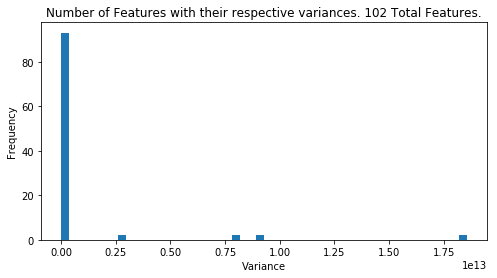

In [2]:
variance = train_x.var(axis=0)

# Plotting HistoGram of Variances.
plt.figure(figsize=(8,4))
variance.plot.hist(bins=50)
plt.title("Number of Features with their respective variances. 102 Total Features.")
plt.xlabel("Variance")
plt.savefig("./FeatureImportance Plots/VarHistPlot.jpg")
plt.show()

# Seeing Variance of each column.
variance = pd.DataFrame(variance)
    
generate_barplot(variance,
                title="Plot Ranking Each Feature Using Variance as a Metric",
                xlabel="Variance",
                ylabel="Features",
                file_path="./FeatureImportance Plots/FeatureSelectionUsingVarMetric.jpg",
                show_fig=False
               )


In [3]:
def feature_selection_var(train_x, threshold=5,verbose=False):
    
    var_selector = VarianceThreshold(threshold=threshold)
    var_selector.fit(train_x)
    selected = var_selector.get_support(indices=True)
    not_selected = [i for i in range(len(train_x.columns)) if i not in selected ]
    result = train_x.iloc[:, selected]
    
    if verbose:
        print("Selected :{} features form :{}".format( len(selected), len(train_x.columns)))
        print("Features Selected are:")
    
    selected = list(train_x.iloc[:, selected].columns)
    not_selected = list(train_x.iloc[:, not_selected].columns)

    if verbose:
        print("Selected Features")
        for feature in selected:
            print(feature)

        print("\n")
        print("Not Selected Features")
        for feature in not_selected:
            print(feature)

    return result
              
# refine_train_x = feature_selection_var(train_x,threshold=5, verbose=False)

# Feature Selection using Univariate Statistical Importance.

Feature Selection Using Mutual Information.
Link - https://en.wikipedia.org/wiki/Mutual_information

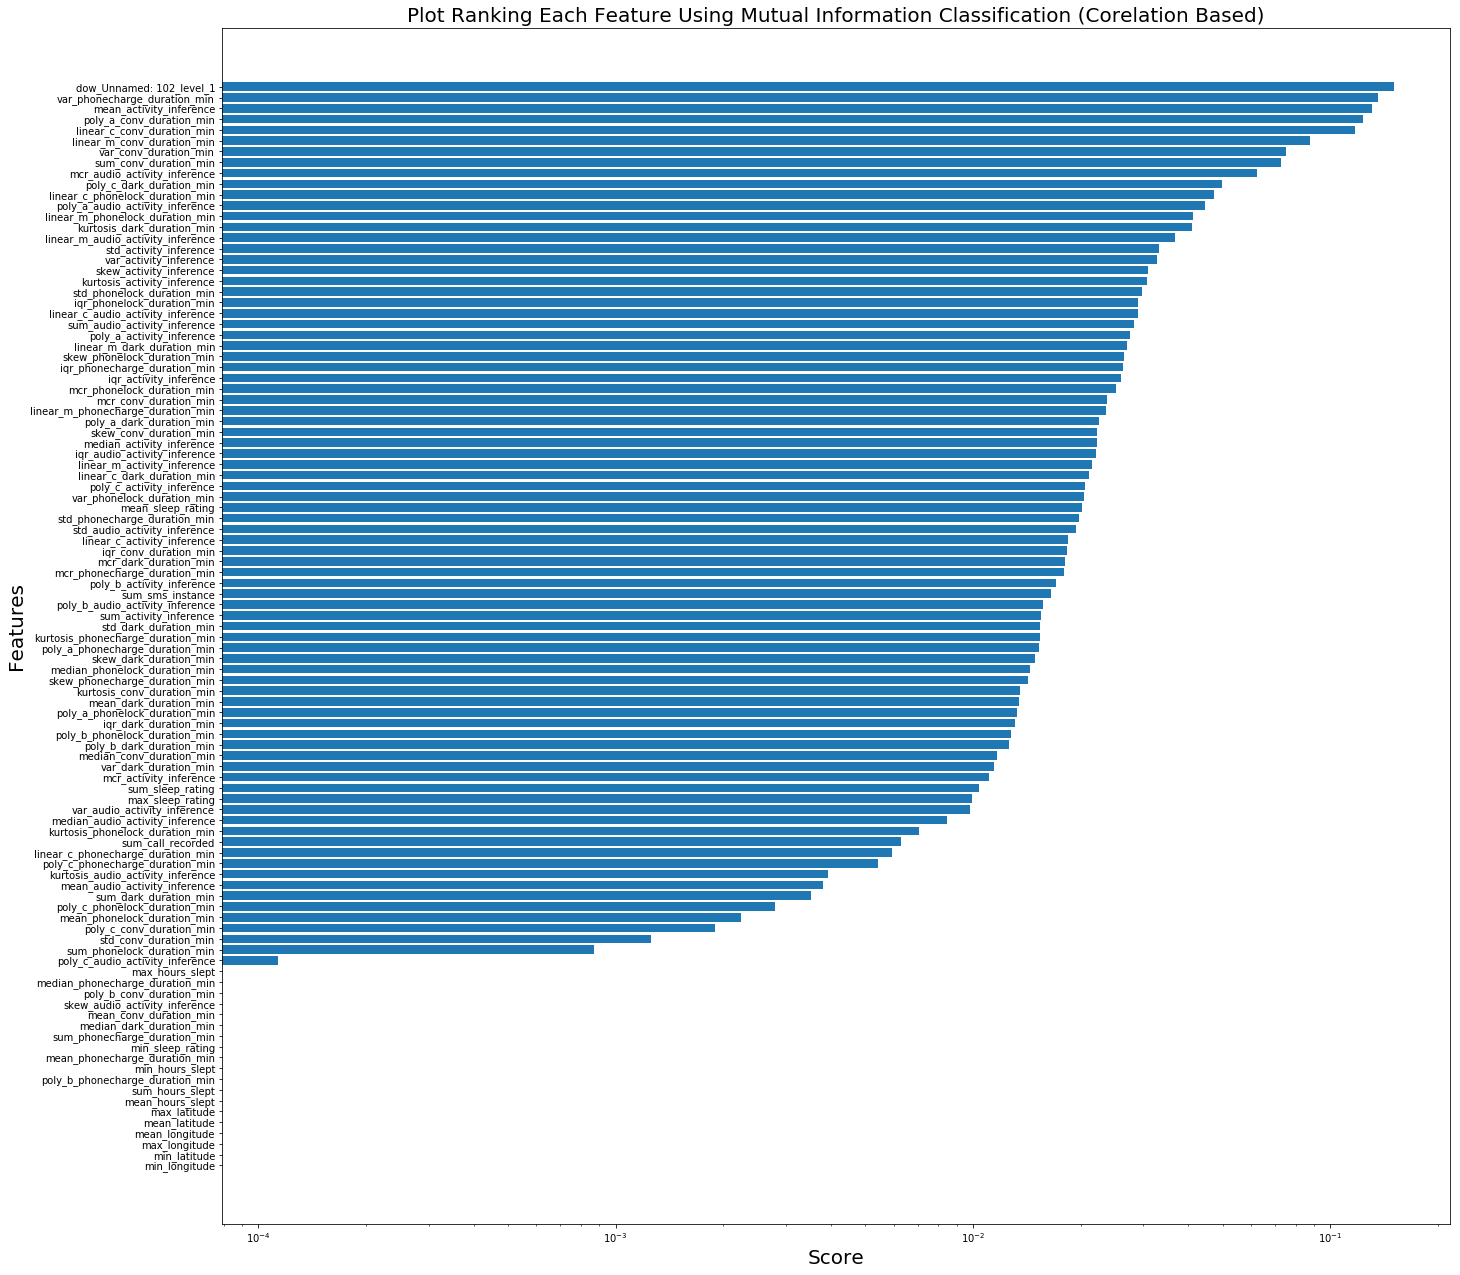

In [4]:
from sklearn.feature_selection import mutual_info_classif

def feature_selection_mutualinfo_classif(train_x, train_y, verbose=False):
    
    mi = pd.DataFrame(mutual_info_classif(train_x, train_y), index=train_x.columns) 
    
    if verbose:
        print("Mutual Information in:")
        display(mi)

    return mi

mi = feature_selection_mutualinfo_classif(train_x, train_y, verbose=False)

generate_barplot(mi,
                title="Plot Ranking Each Feature Using Mutual Information Classification (Corelation Based)",
                xlabel="Score",
                ylabel="Features",
                file_path="./FeatureImportance Plots/FeatureSelectionUsingMIClassif.jpg",
                show_fig=True
               )


Feature Selection using F-test.

In [5]:
def feature_selection_f_classif(train_x, train_y, verbose=False):
    
    f_values, p_values = f_classif(train_x, train_y)
    f_values= pd.DataFrame(f_values, index=train_x.columns) 
    p_values= pd.DataFrame(p_values, index=train_x.columns) 
    
    if verbose:
        print("F-values and P-values are: ")
        print_df = pd.concat([f_values, p_values], axis=1)
        display(print_df)

    return f_values, p_values

f_values, p_values = feature_selection_f_classif(train_x, train_y, verbose=False)

generate_barplot(f_values,
                title="Plot Ranking Each Feature F-test Classification",
                xlabel="Score",
                ylabel="Features",
                file_path="./FeatureImportance Plots/FeatureSelectionUsingF_Test_classification.jpg",
                show_fig=False
               )

generate_barplot(p_values,
                title="Plot Ranking Each Feature P-values Classification",
                xlabel="Score",
                ylabel="Features",
                file_path="./FeatureImportance Plots/FeatureSelectionUsingP_values_classification.jpg",
                show_fig=False
               )


# Feature Selection for Regression.
Feature Selection using Mutual Information.

In [6]:
from sklearn.feature_selection import mutual_info_classif

def feature_selection_mutualinfo_regress(train_x, train_y, verbose=False):
    
    mi = pd.DataFrame(mutual_info_regression(train_x, train_y), index=train_x.columns) 
    
    if verbose:
        print("Mutual Information in:")
        display(mi)

    return mi

mi = feature_selection_mutualinfo_regress(train_x, train_y, verbose=False)

generate_barplot(mi,
                title="Plot Ranking Each Feature Using Mutual Information Regression (Corelation Based)",
                xlabel="Score",
                ylabel="Features",
                file_path="./FeatureImportance Plots/FeatureSelectionUsingMIRegression.jpg",
                show_fig=False
               )


C:\Users\Abhinav Shaw\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


Feature Selection using F-regression.

In [7]:
def feature_selection_f_regress(train_x, train_y, verbose=False):
    
    f_values, p_values = f_regression(train_x, train_y)
    f_values= pd.DataFrame(f_values, index=train_x.columns) 
    p_values= pd.DataFrame(p_values, index=train_x.columns) 
    
    if verbose:
        print("F-values and P-values are: ")
        print_df = pd.concat([f_values, p_values], axis=1)
        display(print_df)

    return f_values, p_values

f_values, p_values = feature_selection_f_regress(train_x, train_y, verbose=False)

generate_barplot(f_values,
                title="Plot Ranking Each Feature F-test Regression",
                xlabel="Score",
                ylabel="Features",
                file_path="./FeatureImportance Plots/FeatureSelectionUsingF_Test_regression.jpg",
                show_fig=False
               )

generate_barplot(p_values,
                title="Plot Ranking Each Feature P-values Regression",
                xlabel="Score",
                ylabel="Features",
                file_path="./FeatureImportance Plots/FeatureSelectionUsingP_values_regression.jpg",
                show_fig=False
               )